In [1]:
import os
import regex as re,string
from urllib import request 
from collections import defaultdict
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
import pandas as pd
import pickle

mpl.rcParams['font.weight']='normal'
plt.rcParams['axes.labelweight'] = 'normal'
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams["font.size"] = 8
# sns.set_palette('Set1',4)
%matplotlib notebook

<IPython.core.display.Javascript object>


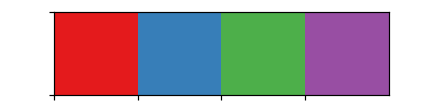

In [2]:
sns.palplot(sns.color_palette("Set1",4))

<IPython.core.display.Javascript object>


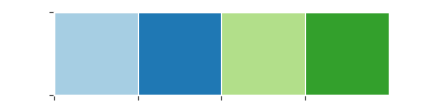

In [9]:
sns.palplot(sns.color_palette("Paired",4))

In [3]:
def download_data(name_dir="data", filename="data.csv",
                  data_url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'):
    """ 
    Download both train and test dataset to a directory named "data". 

    If the directory doesn't exist, this function will create one. 

    Parameters
    ----------
    data_url : str, default 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'
        The URL of the location of the file.
    filename : str, default 'data.csv'
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    No return. Create a directory if needed and 
    download the file to that directory.
    """
    
    if not os.path.isdir(name_dir):
        os.makedirs(name_dir)

    data_path = os.path.join(name_dir, filename)

    request.urlretrieve(data_url,data_path)
    
def GEOID_ten(x):
    """
    Convert 12-digit geoid to 10-digit.
    
    More details can be found at https://www.census.gov/geo/reference/geoidentifiers.html.
    Parameters
    ----------
    x : int
    
    Returns
    -------
    int
    
    """
    
    astr = str(x)[:10]
    return int(astr)

def save_obj(obj, name, name_dir='data' ):
    """
    Save to pickle.
    
    Parameters
    ----------
    obj : any object 
        This can be a dictionary or ndarray.
    name : str
        The name for the object to be saved.
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    No return.
        Save the pickle object to the local file system.
    """
    
    if not os.path.isdir(name_dir):
        os.makedirs(name_dir)

    data_path = os.path.join(name_dir, name+'.pkl')
    
    with open(data_path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name, name_dir='data' ):
    """
    Load the pickle object from the local file system.
    
    Parameters
    ----------
    obj : any object 
        This can be a dictionary or ndarray.
    name : str
        The name for the object to be saved.
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    object
        Return an object such as a dictionary.
    """
    data_path = os.path.join(name_dir, name+'.pkl')
    
    with open(data_path, 'rb') as f:
        return pickle.load(f)

## Download Sub-county population dataset for PA

In [5]:
# https://www.census.gov/data/datasets/2017/demo/popest/total-cities-and-towns.html
url_pop = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'

In [4]:
download_data(name_dir="data", 
              filename="population.csv",
              data_url=url_pop)

NameError: name 'url_pop' is not defined

## Download population data from US Census

In [7]:
url_ems = 'https://data.wprdc.org/dataset/abba9671-a026-4270-9c83-003a1414d628/resource/ff33ca18-2e0c-4cb5-bdcd-60a5dc3c0418/download/911-ems-dispatches.csv'

In [8]:
download_data(name_dir="data", 
              filename="EMS.csv",
              data_url=url_ems)

In [6]:
df_ems = pd.read_csv('data/EMS.csv')
df_ems.head()


,Call_ID_Hash,SERVICE,PRIORITY,PRIORITY_DESC,AGENCY,CALL_QUARTER,CALL_YEAR,DESCRIPTION_SHORT,CITY_CODE,CITY_NAME,GEOID
0,336ba345f5a0,EMS,E0,EMS ALS life threatening response w/ backup,E620,Q1,2015,HEMORRHAGE,PVU,PORT VUE,420035003002
1,f59d50d394fa,EMS,E0,EMS ALS life threatening response w/ backup,E380,Q1,2015,UNCONSCIOUS,PEN,PENN HILLS,420035235011
2,8d56b4f6f9fe,EMS,E0,EMS ALS life threatening response w/ backup,E620,Q1,2015,UNCONSCIOUS,MCK,MCKEESPORT,420035523003
3,e20045d2f6b4,EMS,E0,EMS ALS life threatening response w/ backup,E050,Q1,2015,"GUNSHOT, STABBING, OR OTHER WOUND",PGH,PITTSBURGH,420031306003
4,dbe1c9db46f6,EMS,E0,EMS ALS life threatening response w/ backup,E050,Q1,2015,ASSAULT,PGH,PITTSBURGH,420031609002


In [7]:
df_pop = pd.read_csv('data/population.csv')
df_pop.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
0,40,42,0,0,0,0,0,A,Pennsylvania,Pennsylvania,12702379,12702857,12711063,12742811,12768034,12778450,12790341,12791124,12787085,12805537
1,162,42,0,116,0,0,0,A,Abbottstown borough,Pennsylvania,1011,1011,1010,1011,1008,1006,1009,1012,1013,1020
2,162,42,0,332,0,0,0,A,Adamsburg borough,Pennsylvania,172,172,172,171,170,169,168,167,165,164
3,162,42,0,364,0,0,0,A,Adamstown borough,Pennsylvania,1789,1789,1801,1835,1837,1839,1844,1845,1847,1850
4,162,42,0,396,0,0,0,A,Addison borough,Pennsylvania,207,207,207,205,204,202,201,198,198,197


In [8]:
df_pop['NAME_UP'] = df_pop['NAME'].str.upper() #  .str.replace('[^\w\s]','')
df_pop.head()


,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,NAME_UP
0,40,42,0,0,0,0,0,A,Pennsylvania,Pennsylvania,...,12702857,12711063,12742811,12768034,12778450,12790341,12791124,12787085,12805537,PENNSYLVANIA
1,162,42,0,116,0,0,0,A,Abbottstown borough,Pennsylvania,...,1011,1010,1011,1008,1006,1009,1012,1013,1020,ABBOTTSTOWN BOROUGH
2,162,42,0,332,0,0,0,A,Adamsburg borough,Pennsylvania,...,172,172,171,170,169,168,167,165,164,ADAMSBURG BOROUGH
3,162,42,0,364,0,0,0,A,Adamstown borough,Pennsylvania,...,1789,1801,1835,1837,1839,1844,1845,1847,1850,ADAMSTOWN BOROUGH
4,162,42,0,396,0,0,0,A,Addison borough,Pennsylvania,...,207,207,205,204,202,201,198,198,197,ADDISON BOROUGH


In [9]:
df_ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780698 entries, 0 to 780697
Data columns (total 11 columns):
Call_ID_Hash         780698 non-null object
SERVICE              780698 non-null object
PRIORITY             780698 non-null object
PRIORITY_DESC        780698 non-null object
AGENCY               780698 non-null object
CALL_QUARTER         780698 non-null object
CALL_YEAR            780698 non-null int64
DESCRIPTION_SHORT    778103 non-null object
CITY_CODE            780634 non-null object
CITY_NAME            780611 non-null object
GEOID                780698 non-null int64
dtypes: int64(2), object(9)
memory usage: 65.5+ MB


In [10]:
def getCodeName(geoid,df):
    """
    Return city name and city code for a given geioid.
    
    Parameters
    ----------
    geoid : int
    df : DataFrame
    
    Returns
    -------
    tuple
    """
    temp = df[(df_ems.GEOID == geoid) & (df.CITY_NAME.notnull()) ][['CITY_CODE','CITY_NAME']]
    city_name = temp['CITY_NAME'].value_counts().index[0]
    city_code = temp[ temp['CITY_NAME'] == city_name]['CITY_CODE'].value_counts().index[0]
#     print(city_name,city_code)
    return city_name,city_code

def nested_dict():
  """
  This returns a empty nestable dictionary.
  """
  return defaultdict(nested_dict)




In [11]:
getCodeName(420035629002,df_ems)

('PITTSBURGH', 'PGH')

In [14]:
# Get index for missing values at CITY_CODE and CITY_NAME
index_for_missing_values = df_ems[(df_ems.CITY_NAME.isnull()) | (df_ems.CITY_CODE.isnull())].index.tolist()
index_for_missing_values[:10]

[7200, 7237, 29818, 45426, 51944, 69156, 104522, 104614, 107710, 114511]

In [15]:
# Fill the missing values
for index in index_for_missing_values:
    geoid = df_ems.loc[index,'GEOID']
    ct_name, ct_code = getCodeName(geoid,df_ems)
    
    df_ems.loc[index,'CITY_NAME'] = ct_name
    df_ems.loc[index,'CITY_CODE'] = ct_code

# Recheck missing at CITY_CODE and CITY_NAME
df_ems[(df_ems.CITY_NAME.isnull()) | (df_ems.CITY_CODE.isnull())].index.tolist()


[]

In [16]:
df_ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780698 entries, 0 to 780697
Data columns (total 11 columns):
Call_ID_Hash         780698 non-null object
SERVICE              780698 non-null object
PRIORITY             780698 non-null object
PRIORITY_DESC        780698 non-null object
AGENCY               780698 non-null object
CALL_QUARTER         780698 non-null object
CALL_YEAR            780698 non-null int64
DESCRIPTION_SHORT    778103 non-null object
CITY_CODE            780698 non-null object
CITY_NAME            780698 non-null object
GEOID                780698 non-null int64
dtypes: int64(2), object(9)
memory usage: 65.5+ MB


In [17]:
df_ems[df_ems.DESCRIPTION_SHORT.isnull()]['PRIORITY_DESC'].value_counts()

EMS Admin Mark out                             2491
EMS ALS life threatening response                31
EMS Standard BLS response                        31
EMS Standard ALS response                        21
EMS ALS life threatening response w/ backup      12
EMS BLS Assistance response                       8
Fire Notifications                                1
Name: PRIORITY_DESC, dtype: int64

In [18]:
df_ems['DESCRIPTION_SHORT'].fillna('MISSING',inplace=True)

In [19]:
df_ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780698 entries, 0 to 780697
Data columns (total 11 columns):
Call_ID_Hash         780698 non-null object
SERVICE              780698 non-null object
PRIORITY             780698 non-null object
PRIORITY_DESC        780698 non-null object
AGENCY               780698 non-null object
CALL_QUARTER         780698 non-null object
CALL_YEAR            780698 non-null int64
DESCRIPTION_SHORT    780698 non-null object
CITY_CODE            780698 non-null object
CITY_NAME            780698 non-null object
GEOID                780698 non-null int64
dtypes: int64(2), object(9)
memory usage: 65.5+ MB


In [22]:
ct_names = df_ems.CITY_NAME.unique().tolist()
ct_names[:10]

['PORT VUE',
 'PENN HILLS',
 'MCKEESPORT',
 'PITTSBURGH',
 'ROSS',
 'SOUTH FAYETTE',
 'FRANKLIN PARK',
 'DUQUESNE',
 'PITCAIRN',
 'WEST MIFFLIN']

In [23]:
# Check Westmoreland county in city names
df_ems[df_ems.CITY_NAME.isin(['WESTMORELAND COUNTY'])]

,Call_ID_Hash,SERVICE,PRIORITY,PRIORITY_DESC,AGENCY,CALL_QUARTER,CALL_YEAR,DESCRIPTION_SHORT,CITY_CODE,CITY_NAME,GEOID
211893,eb764b289f44,EMS,E1,EMS ALS life threatening response,E590,Q4,2015,COMMERCIAL OR APARTMENT BLDG FIRE,WST,WESTMORELAND COUNTY,420034961023


In [24]:
# Drop westmoreland county
print("No. of rows before dropping = ", len(df_ems))
df_ems.drop(df_ems[df_ems.CITY_NAME.isin(['WESTMORELAND COUNTY'])].index, inplace=True)
print("No. of rows after dropping = ", len(df_ems))

No. of rows before dropping =  780698
No. of rows after dropping =  780697


In [26]:
# Save data after filling missing values.
# save_obj(df_ems,'df_ems')
df_ems = load_obj('df_ems')

In [27]:
# Rebuild the city name list
ct_names = df_ems.CITY_NAME.unique().tolist()

In [28]:
df_pop.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,NAME_UP
0,40,42,0,0,0,0,0,A,Pennsylvania,Pennsylvania,...,12702857,12711063,12742811,12768034,12778450,12790341,12791124,12787085,12805537,PENNSYLVANIA
1,162,42,0,116,0,0,0,A,Abbottstown borough,Pennsylvania,...,1011,1010,1011,1008,1006,1009,1012,1013,1020,ABBOTTSTOWN BOROUGH
2,162,42,0,332,0,0,0,A,Adamsburg borough,Pennsylvania,...,172,172,171,170,169,168,167,165,164,ADAMSBURG BOROUGH
3,162,42,0,364,0,0,0,A,Adamstown borough,Pennsylvania,...,1789,1801,1835,1837,1839,1844,1845,1847,1850,ADAMSTOWN BOROUGH
4,162,42,0,396,0,0,0,A,Addison borough,Pennsylvania,...,207,207,205,204,202,201,198,198,197,ADDISON BOROUGH


In [29]:
def get_pop(ct_name, df, name_col, yr_st, yr_end):
    columns=['POPESTIMATE{yr}'.format(yr=str(yr)) 
             for yr in range(yr_st, yr_end+1)]
    ct_ext = ['BOROUGH', 'CITY', 'TOWNSHIP', 'MUNICIPALITY']
    if ct_name.endswith(('BOROUGH', 'CITY', 'TOWNSHIP', 'BORO')):
        alist = ct_name.split()
        ct_name = ' '.join(alist[:-1])
    if 'CLAIR' in ct_name:
        ct_name = ct_name.replace('ST ', 'ST. ')
    ct_names = ['{name} {ext}'.format(name=ct_name, ext=ext) 
                for ext in ct_ext]
    return (df[(df[name_col]
                .isin(ct_names))][columns]
            .median().astype('int').tolist())
    

In [30]:
get_pop('SOUTH FAYETTE',df_pop,'NAME_UP',2015,2017)

[15423, 15511, 15614]

In [31]:
def get_pop_dict(ct_names, df, name_col, yr_st, yr_end):
    pop_dict = nested_dict()
    for ct_name in ct_names:
        try:
            pops = get_pop(ct_name, df, name_col, yr_st, yr_end)
            for yr,pop in zip(range(yr_st,yr_end+1), pops):
                pop_dict[ct_name][yr]=pop
        except ValueError:
            print(ct_name)
            return ct_name
    return pop_dict

In [32]:
#pop_dict = get_pop_dict(ct_names,df_pop,'NAME_UP',2015,2017)
# load pop_dict from the local system.
pop_dict = load_obj('pop_dict')

In [28]:
# Save pop_dict to a local file system.
# save_obj(pop_dict, 'pop_dict')

In [33]:
def get_pop(x, **kwargs):
    pop_dict = kwargs['pop_dict']
    yr = kwargs['yr']
    if yr == 2018:
        yr = 2017
    return pop_dict[x][yr]

def get_call_per_city(df, pop_dict, yr):
    df_city_count =df[df['CALL_YEAR'] == yr]['CITY_NAME'].value_counts().reset_index()
    df_city_count.columns = ['CITY_NAME', 'NO. OF CALLS']
    df_city_count['PERCENTAGE OVER TOTAL CALLS'] = round(df_city_count['NO. OF CALLS']/
                                                         df_city_count['NO. OF CALLS'].sum()*
                                                         100,2)
    col_name = 'POPULATION'.format(yr=yr)
    df_city_count[col_name] = (df_city_count['CITY_NAME']
                               .apply(get_pop, pop_dict=pop_dict, yr = yr))
    
    df_city_count['CALL_PER_POP'] = (df_city_count['NO. OF CALLS']/
                                     df_city_count[col_name])
    # Sort the column
    df_city_count.sort_values(by=['CALL_PER_POP',col_name],
                              ascending=False,
                              inplace=True)
    
    return df_city_count
    
    

In [34]:
call_per_city_2015 = get_call_per_city(df_ems, pop_dict, 2015)
call_per_city_2015.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
19,HARRISON,1823,0.97,1011,1.803165
43,PINE,1039,0.55,744,1.396505
24,ELIZABETH TOWNSHIP,1645,0.87,1504,1.093750
32,RICHLAND,1397,0.74,1567,0.891512
4,ROSS,4700,2.49,5774,0.813994


In [35]:
call_per_city_2016 = get_call_per_city(df_ems, pop_dict, 2016)
call_per_city_2016.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
18,HARRISON,1995,1.02,1002,1.991018
50,PINE,991,0.51,743,1.333782
32,ELIZABETH TOWNSHIP,1490,0.76,1492,0.998660
4,ROSS,4755,2.44,5763,0.825091
37,RICHLAND,1251,0.64,1579,0.792274


In [36]:
call_per_city_2017 = get_call_per_city(df_ems, pop_dict, 2017)
call_per_city_2017.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
19,HARRISON,1979,1.01,994,1.990946
42,PINE,1088,0.55,738,1.474255
30,ELIZABETH TOWNSHIP,1588,0.81,1482,1.071525
4,ROSS,4686,2.38,5805,0.807235
38,RICHLAND,1261,0.64,1594,0.791092


In [37]:
call_per_city_2018 = get_call_per_city(df_ems, pop_dict, 2018)
call_per_city_2018.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
19,HARRISON,1924,0.96,994,1.935614
45,PINE,1065,0.53,738,1.443089
27,ELIZABETH TOWNSHIP,1666,0.83,1482,1.124157
35,RICHLAND,1417,0.71,1594,0.888959
4,ROSS,4878,2.44,5805,0.840310


In [38]:
def Top_plot(df1, df2, df3, df4, pop_cutoff=0, top=10):
    city_names = []
    for df in [df1,df2,df3,df4]:
        city_names.extend(df1.iloc[:top,0].tolist())
    city_names = list(set(city_names))
    col_names = ['CITY_NAME', 'NO. OF CALLS', 
                 'POPULATION', 'CALL_PER_POP', 'YEAR']
    df_temp = pd.DataFrame(columns=col_names)
    for df, yr in zip([df1, df2, df3, df4],[2015, 2016, 2017, 2018]):
        df['YEAR'] = yr
        df_temp = df_temp.append(df[(df['CITY_NAME'].isin(city_names))
                                    & (df.iloc[:,3] > pop_cutoff)][col_names]
                                 .sort_values(by=['CALL_PER_POP','NO. OF CALLS'],
                                 ascending=False))
         
    return df_temp
    

In [41]:
Top_20_df = Top_plot(call_per_city_2015, call_per_city_2016, call_per_city_2017,call_per_city_2018,top=20)

In [64]:
def bar_plot(df,y='CALL_PER_POP',x='CITY_NAME',hue='YEAR'):
    plt.figure()
    with plt.style.context('ggplot'):
        sns.barplot(x=x, y=y, 
                    hue=hue, data=df, palette=sns.color_palette("bright", 4))
        plt.xticks(rotation=90)
    

<IPython.core.display.Javascript object>


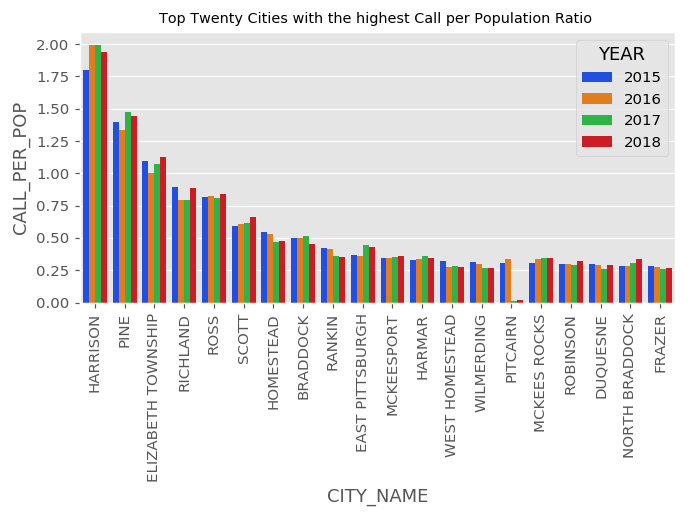

In [65]:
bar_plot(Top_20_df)
plt.title("Top Twenty Cities with the highest Call per Population Ratio ")
plt.tight_layout()

<IPython.core.display.Javascript object>


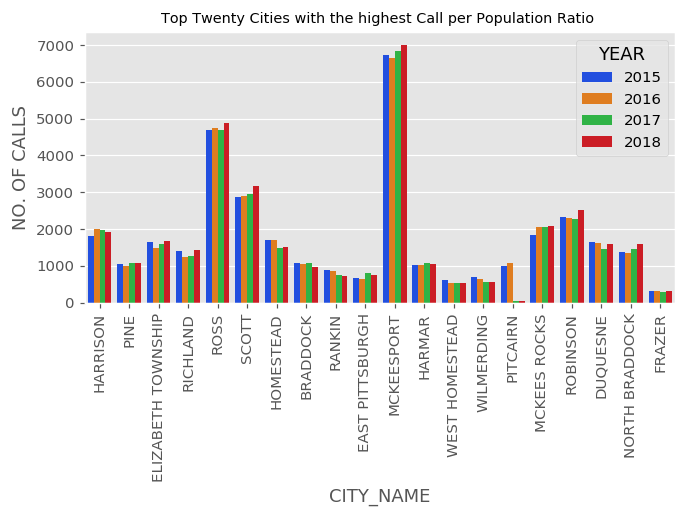

In [66]:
bar_plot(Top_20_df,'NO. OF CALLS')
plt.title("Top Twenty Cities with the highest Call per Population Ratio ")
plt.tight_layout()

<IPython.core.display.Javascript object>


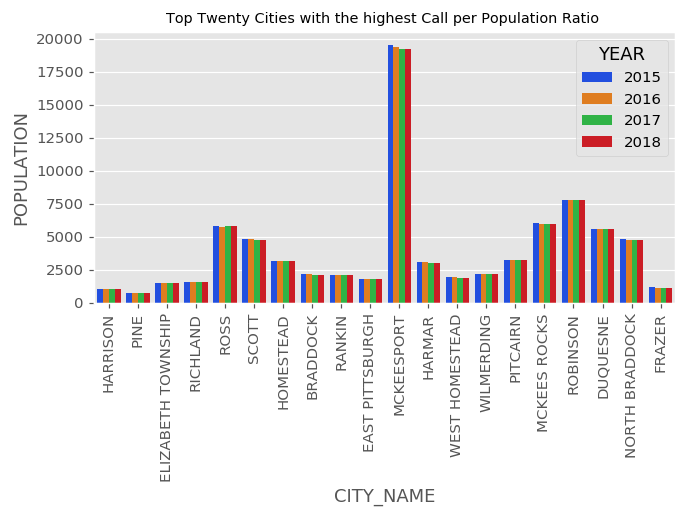

In [67]:
bar_plot(Top_20_df,'POPULATION')
plt.title("Top Twenty Cities with the highest Call per Population Ratio ")
plt.tight_layout()

In [69]:
Top_20_df_3000 = Top_plot(call_per_city_2015, 
                          call_per_city_2016, 
                          call_per_city_2017,
                          call_per_city_2018,
                          top=34,pop_cutoff=3000)

<IPython.core.display.Javascript object>


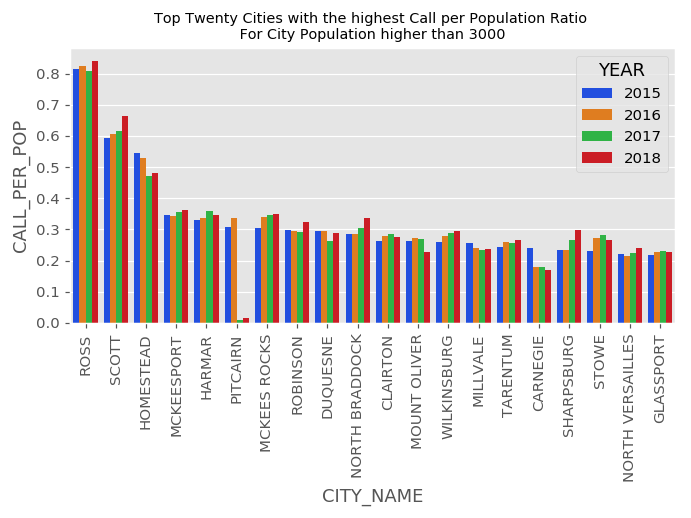

In [70]:
bar_plot(Top_20_df_3000)
plt.title("Top Twenty Cities with the highest Call per Population Ratio \n For City Population higher than 3000 ")
plt.tight_layout()

<IPython.core.display.Javascript object>


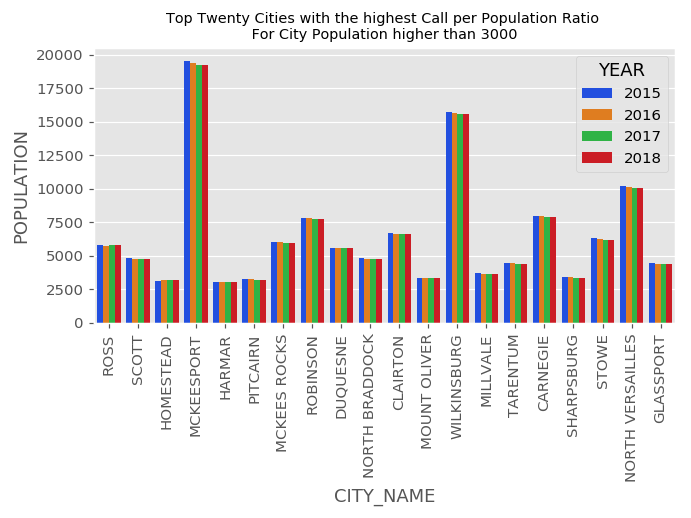

In [109]:
bar_plot(Top_20_df_3000,'POPULATION')
plt.title("Top Twenty Cities with the highest Call per Population Ratio \n For City Population higher than 3000 ")
plt.tight_layout()

<IPython.core.display.Javascript object>


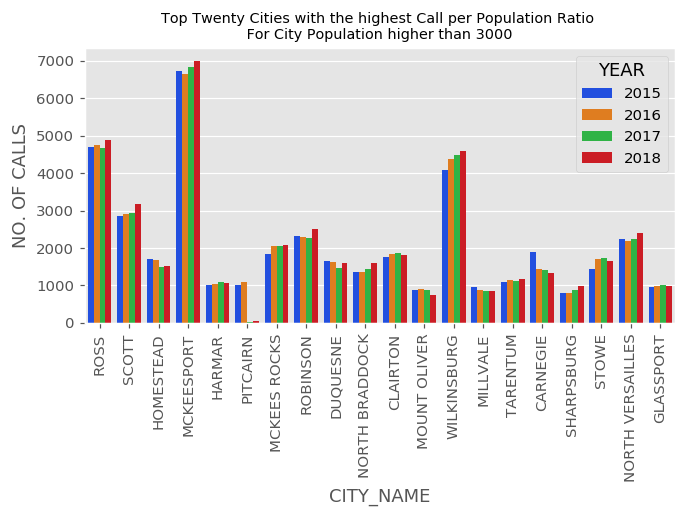

In [71]:
bar_plot(Top_20_df_3000, 'NO. OF CALLS')
plt.title("Top Twenty Cities with the highest Call per Population Ratio \n For City Population higher than 3000 ")
plt.tight_layout()

In [73]:
df_ems_Q = df_ems.groupby(['CALL_QUARTER', 'CALL_YEAR']).size().reset_index(name='COUNT')
df_ems_Q.head()

,CALL_QUARTER,CALL_YEAR,COUNT
0,Q1,2015,47103
1,Q1,2016,46434
2,Q1,2017,48690
3,Q1,2018,49261
4,Q2,2015,47254


<IPython.core.display.Javascript object>


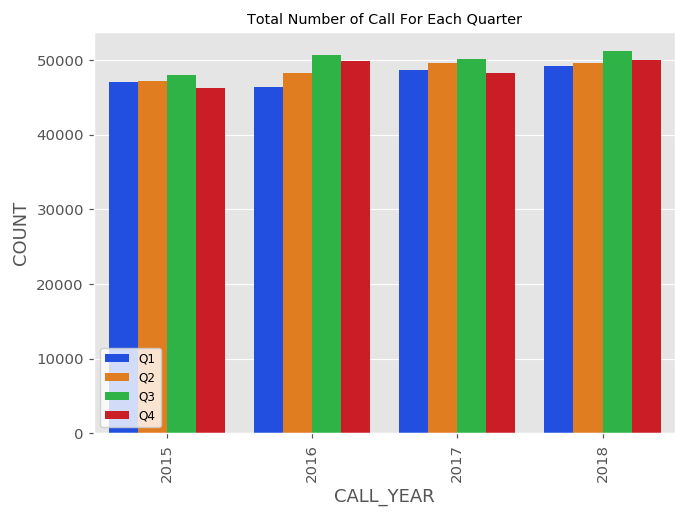

In [93]:
bar_plot(df_ems_Q,y='COUNT',x='CALL_YEAR',hue='CALL_QUARTER')
plt.legend(loc='lower left')
plt.title("Total Number of Call For Each Quarter")
plt.tight_layout()


In [143]:
def grid_bar_plot(df, col='CITY_NAME', x=['PITTSBURGH','HOMESTEAD', 'PINE']):
    nrow = int(round(len(x)/2,0))
    
    df_mod = dict()
    for name in x:
        df_mod[name] = (df[df[col] == name]
                        .groupby(['CALL_QUARTER', 'CALL_YEAR'])
                        .size().reset_index(name='COUNT'))
        
    
    with plt.style.context('ggplot'):
        fig, axes = plt.subplots(nrows=nrow, ncols=2, figsize=(8,4*nrow))
        fig.subplots_adjust(hspace = .1, wspace=.1)
        axes = axes.ravel()
        
        for ax, name in zip(axes, x):
            g = sns.barplot(x='CALL_YEAR', y='COUNT', hue='CALL_QUARTER',  
                            data=df_mod[name], ax = ax, 
                            palette=sns.color_palette("bright", 4))
            ax.legend_.remove()
            ax.set_title('EMS Call Per \n Quarter in {ct}'.format(ct=name))
#             ax.legend(loc='lower left')
#             g.fig.get_axes()[0].legend(loc='lower left')
#             g.set_xticklabels(g.get_xticklabels(), rotation=90)
#     plt.legend(loc='lower left')
        plt.tight_layout()

<IPython.core.display.Javascript object>


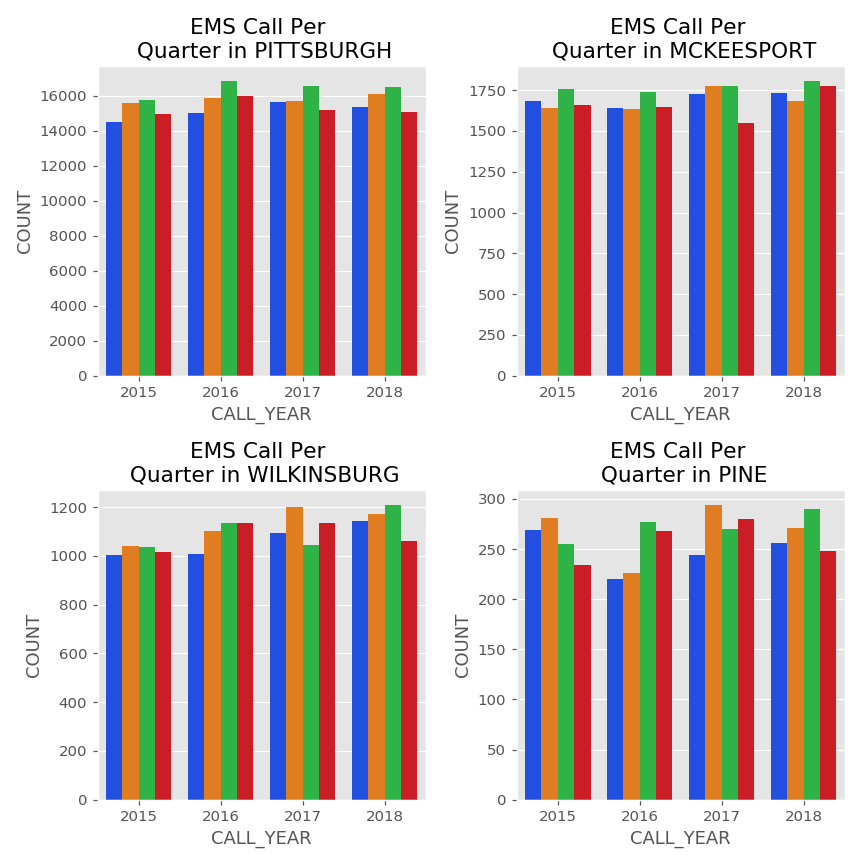

In [144]:
grid_bar_plot(df_ems,x=['PITTSBURGH','MCKEESPORT','WILKINSBURG','PINE'] )

<IPython.core.display.Javascript object>


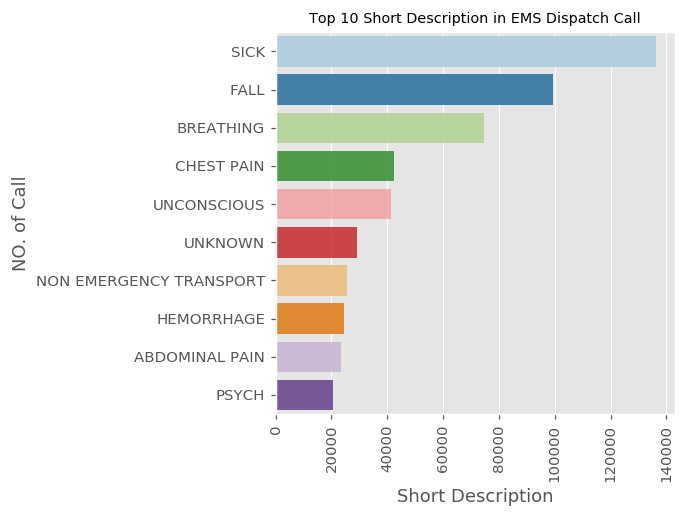

In [83]:
description_count = df_ems['DESCRIPTION_SHORT'].value_counts()
description_count = description_count[:10,]
plt.figure()
with plt.style.context('ggplot'):
    sns.barplot(description_count.values,
                description_count.index, alpha=0.9,
                palette=sns.color_palette('Paired'))
plt.xticks(rotation=90)
plt.title("Top 10 Short Description in EMS Dispatch Call")
plt.ylabel("NO. of Call")
plt.xlabel("Short Description")
plt.tight_layout()

<IPython.core.display.Javascript object>


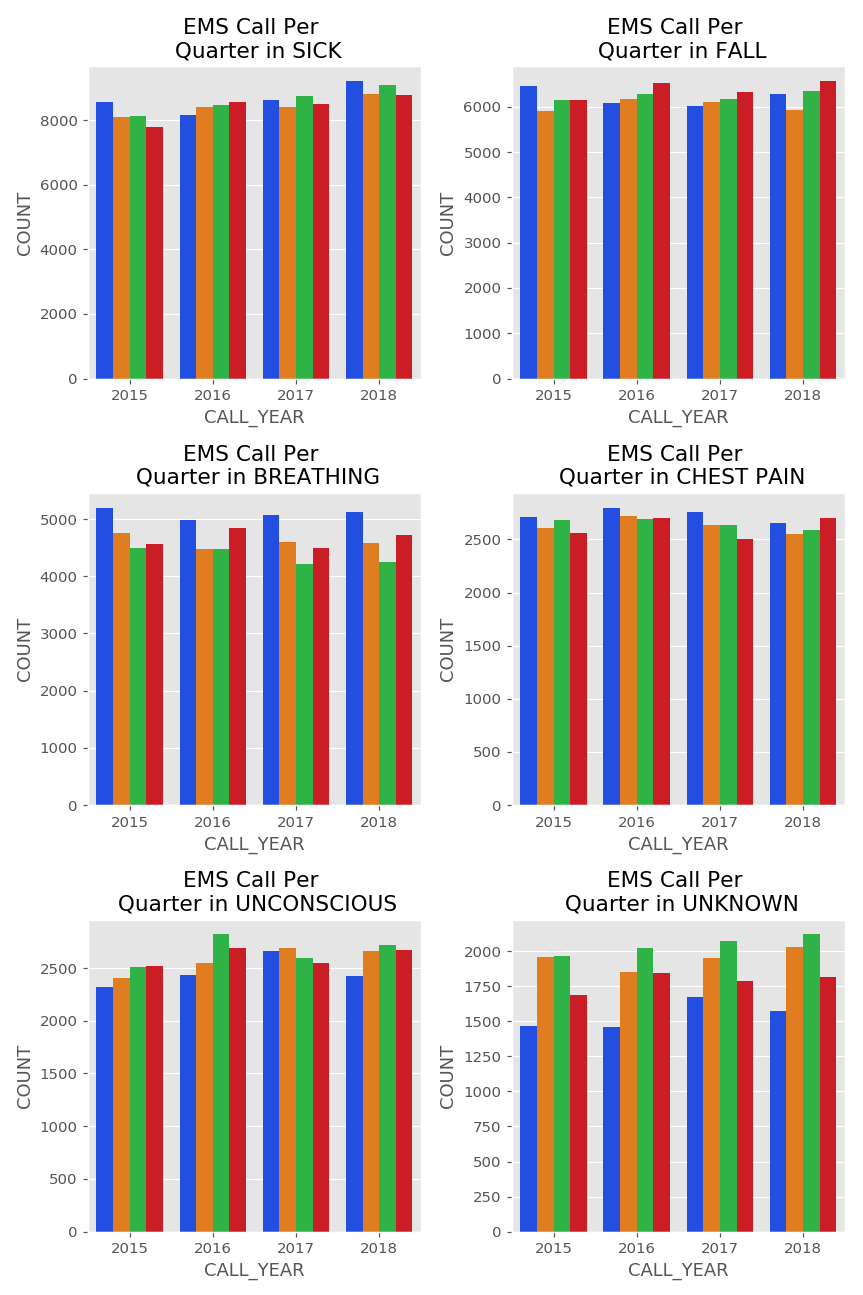

In [147]:
grid_bar_plot(df_ems, col='DESCRIPTION_SHORT', x=['SICK','FALL','BREATHING','CHEST PAIN','UNCONSCIOUS','UNKNOWN'])

In [91]:
len(df_ems)

780697

In [88]:
# Convert population dictionary to dataframe
pop_df=pd.DataFrame.from_dict(pop_dict,orient='index')
pop_df['POP_AVG']=pop_df.mean(axis=1).astype('int')
pop_df = pop_df.rename_axis("CITY_NAME").reset_index()
pop_df.head()

,CITY_NAME,2015,2016,2017,POP_AVG
0,ALEPPO,1198,1191,1184,1191
1,ASPINWALL,2770,2749,2732,2750
2,AVALON,4651,4616,4586,4617
3,BALDWIN BORO,19802,19741,19610,19717
4,BALDWIN TOWNSHIP,19802,19741,19610,19717


In [89]:
# Build a dataframe with accumulative calls for each city
df_total_call=(df_ems
  .groupby(['CITY_NAME']).size().reset_index(name='TOTAL_CALL')
  .sort_values(by=['TOTAL_CALL'],ascending=False))

In [90]:
# Add average population column to the dataframe
df_total_call = pd.merge(df_total_call, 
                         pop_df[['CITY_NAME','POP_AVG']], 
                         how='left',on='CITY_NAME')
df_total_call.head()

,CITY_NAME,TOTAL_CALL,POP_AVG
0,PITTSBURGH,250676,303959
1,MCKEESPORT,27228,19374
2,PENN HILLS,26626,41576
3,MOUNT LEBANON,23044,32565
4,ROSS,19019,5780


In [369]:
a=(df_ems[df_ems['DESCRIPTION_SHORT'] == 'SICK']
  .groupby(['CITY_NAME','CALL_QUARTER']).size().reset_index(name='SICK_CALL')
  .sort_values(by=['SICK_CALL'],ascending=False))
a.head()

,CITY_NAME,CALL_QUARTER,SICK_CALL
342,PITTSBURGH,Q3,11876
340,PITTSBURGH,Q1,11519
341,PITTSBURGH,Q2,11372
343,PITTSBURGH,Q4,11219
325,PENN HILLS,Q2,1183


In [85]:
def get_description_table(df, df_total_call, description):
    temp=(df[df['DESCRIPTION_SHORT'] == description]
          .groupby(['CITY_NAME','CALL_QUARTER']).size().reset_index(name=description)
          .sort_values(by=[description],ascending=False))
    temp = pd.merge(temp,df_total_call, how='left',on='CITY_NAME')
    temp['Call Ratio'] = round(temp.loc[:,description]/
                               temp.loc[:,'TOTAL_CALL'],3)
#     temp.sort_values(by=['CITY_NAME','CALL_QUARTER','Call Ratio','TOTAL_CALL'],
#                      inplace=True,ascending=False)
    return temp

In [86]:
t=get_description_table(df_ems, df_total_call, 'SICK')

NameError: name 'df_total_call' is not defined

In [382]:
t.head()

,CITY_NAME,CALL_QUARTER,FALL,TOTAL_CALL,POP_AVG,Call Ratio
0,PITTSBURGH,Q3,6291,250676,303959,0.025
1,PITTSBURGH,Q1,6151,250676,303959,0.025
2,PITTSBURGH,Q2,5961,250676,303959,0.024
3,PITTSBURGH,Q4,5905,250676,303959,0.024
4,PENN HILLS,Q4,1057,26626,41576,0.040


In [392]:
t2=t.groupby(['CITY_NAME'],as_index=False).agg({'Call Ratio':sum,
                                                'TOTAL_CALL':max})
t2.sort_values(by=['Call Ratio'],inplace=True,ascending=False)

In [394]:
t2.head(10)

,CITY_NAME,Call Ratio,TOTAL_CALL
111,THORNBURG,0.250,112
103,SOUTH FAYETTE,0.239,8763
59,KENNEDY,0.239,6861
97,SCOTT,0.215,11884
63,LIBERTY,0.208,1121
50,HAMPTON,0.206,6584
16,BRIDGEVILLE,0.204,3185
10,BLAWNOX,0.201,1028
17,CARNEGIE,0.196,6077
66,MCCANDLESS,0.192,15570


In [339]:
cc = pd.merge(a,aa, how='left',on='CITY_NAME')

In [340]:
cc ['Ratio'] = cc.iloc[:,1]/cc.iloc[:,2]

In [341]:
cc.sort_values(by=['Ratio'],inplace=True,ascending=False)

In [342]:
cc.head(10)

,CITY_NAME,SICK_CALLS,TOTAL_CALLS,Ratio
36,HARMAR,991,4177,0.237252
7,BALDWIN BORO,2944,13260,0.222021
51,BRACKENRIDGE,624,2830,0.220495
101,BRADFORD WOODS,70,318,0.220126
10,SOUTH FAYETTE,1902,8763,0.217049
11,WHITEHALL,1877,8667,0.216569
40,INDIANA,829,3850,0.215325
33,OAKMONT,997,4731,0.210738
8,SCOTT,2493,11884,0.209778
47,RANKIN,663,3220,0.205901


,CITY_NAME,2015,2016,2017,avg_pop
0,ALEPPO,1198,1191,1184,1191
1,ASPINWALL,2770,2749,2732,2750
2,AVALON,4651,4616,4586,4617
3,BALDWIN BORO,19802,19741,19610,19717
4,BALDWIN TOWNSHIP,19802,19741,19610,19717
5,BELL ACRES,1392,1392,1388,1390
6,BELLEVUE,8274,8213,8159,8215
7,BEN AVON,1780,1765,1754,1766
8,BEN AVON HEIGHTS,373,368,365,368
9,BETHEL PARK,32024,31849,32404,32092


In [330]:
b

,2015,2016,2017,avg_pop
ALEPPO,1198,1191,1184,1191
ASPINWALL,2770,2749,2732,2750
AVALON,4651,4616,4586,4617
BALDWIN BORO,19802,19741,19610,19717
BALDWIN TOWNSHIP,19802,19741,19610,19717
BELL ACRES,1392,1392,1388,1390
BELLEVUE,8274,8213,8159,8215
BEN AVON,1780,1765,1754,1766
BEN AVON HEIGHTS,373,368,365,368
BETHEL PARK,32024,31849,32404,32092


In [313]:
c = a.join(b, how='left',on='CITY_NAME')

In [317]:
c['CALL_PER_POP'] = c.iloc[:,1]/c.iloc[:,5]
c.sort_values(inplace=True,by=['CALL_PER_POP'],ascending=False)

In [318]:
c

,CITY_NAME,TOTAL_CALLS,2015,2016,2017,avg_pop,CALL_PER_POP
48,HARRISON,115,1011,1002,994,1002,0.114770
10,BRADDOCK,140,2134,2129,2116,2126,0.065851
80,PINE,47,744,743,738,741,0.063428
34,ELIZABETH TOWNSHIP,93,1504,1492,1482,1492,0.062332
64,MILLVALE,147,3699,3672,3648,3673,0.040022
90,ROSS,226,5774,5763,5805,5780,0.039100
68,MOUNT OLIVER,123,3362,3337,3315,3338,0.036848
99,STOWE,221,6289,6242,6201,6244,0.035394
62,MCKEES ROCKS,210,6032,5990,5950,5990,0.035058
92,SCOTT,151,4820,4786,4772,4792,0.031511
